In [66]:
import numpy as np
from minepy import MINE
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
 

In [4]:
x = np.linspace(0, 1, 1000)
y = np.sin(10 * np.pi * x) + x

def mic(x, y):
     m = MINE()
     m.compute_score(x, y)
     return m.mic()

mic(x,y)

1.0000000000000002

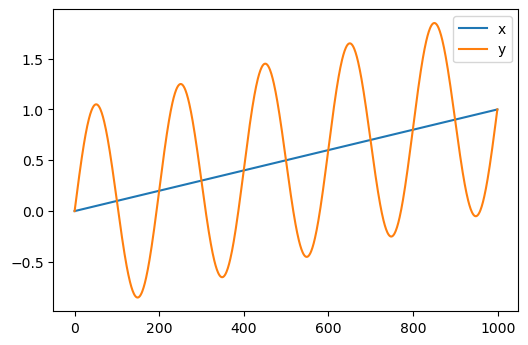

Without noise:
MIC 1.0000000000000002


In [9]:
x = np.linspace(0, 1, 1000)
y = np.sin(10 * np.pi * x) + x
mine = MINE(alpha=0.6, c=15)
mine.compute_score(x, y)
 
plt.figure(1,dpi=100)
# x= np.linspace(1,l1,l1) # x轴的定义域为 -3.14~3.14，中间间隔100个元素
plt.plot(x,label = "x")
plt.plot(y,label = "y")
plt.legend()
plt.show()
    
print("Without noise:")
print("MIC", mine.mic())
 

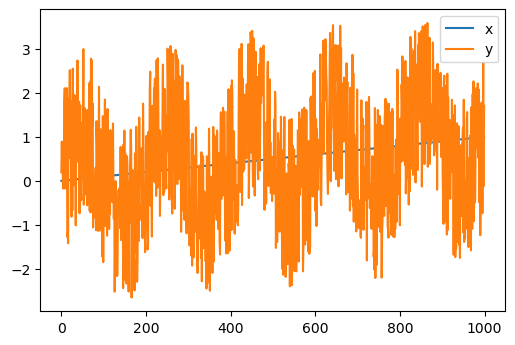

With noise:
MIC 0.2349683048992597


In [12]:
np.random.seed(0)
y += np.random.uniform(-1, 1, x.shape[0])  # add some noise
mine.compute_score(x, y)

plt.figure(1,dpi=100)
# x= np.linspace(1,l1,l1) # x轴的定义域为 -3.14~3.14，中间间隔100个元素
plt.plot(x,label = "x")
plt.plot(y,label = "y")
plt.legend()
plt.show()
 
print("With noise:")
print("MIC", mine.mic())

In [17]:
r = (np.corrcoef(x, y)[0,1])
r

0.13322730473078312

In [13]:
from scipy.stats import pearsonr


r = pearsonr(x, y)
r

(0.19518835158998896, 4.82654757462444e-10)

In [33]:
from minepy import MINE
from numpy import array
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
 
irisdata = load_iris()
 
def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)
 
#选择 K 个最好的特征，返回特征选择后的数据
irisdata_new =  SelectKBest(lambda X, Y: tuple(map(tuple,
                array(list(map(lambda x:mic(x, Y), 
                X.T))).T)),k=3).fit_transform(irisdata.data, irisdata.target)
 
print(irisdata.data.shape, irisdata_new.shape)

(150, 4) (150, 3)


数据构建

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
x = np.linspace(0, 1, 501)
df1=pd.DataFrame(np.sin(10 * np.pi * x)*100+x*100 ,columns=['a'])
df2=pd.DataFrame(np.sin(10 * np.pi * (x+0.012))*100+(x+0.012)*100 ,columns=['b'])
df3=pd.DataFrame(np.sin(10 * np.pi * (x+0.008))*100+(x+0.008)*100 ,columns=['T-2'])
df4=pd.DataFrame(np.sin(10 * np.pi * (x+0.004))*100+(x+0.004)*100 ,columns=['T-4'])
df5=pd.DataFrame(np.sin(10 * np.pi * (x+0))*100+(x+0.0)*100 ,columns=['T-6'])
#x

In [88]:
data =  pd.concat([df1,df2,df3,df4,df5],axis=1)

outpath = r'C:\Users\bobo23456\Desktop\时滞\sinx.xlsx'
data.to_excel(outpath)
data

,a,b,T-2,T-4,T-6
0,0.000000,38.012455,25.668989,12.933323,0.000000
1,6.479052,43.977929,31.901699,19.338131,6.479052
2,12.933323,49.775367,38.012455,25.668989,12.933323
3,19.338131,55.382679,43.977929,31.901699,19.338131
4,25.668989,60.778525,49.775367,38.012455,25.668989
...,...,...,...,...,...
496,74.331011,112.933323,100.000000,87.066677,74.331011
497,80.661869,119.338131,106.479052,93.520948,80.661869
498,87.066677,125.668989,112.933323,100.000000,87.066677
499,93.520948,131.901699,119.338131,106.479052,93.520948


In [86]:
data.corr()

,a,b,T-2,T-4,T-6
a,1.000000,0.932559,0.969748,0.992395,1.000000
b,0.932559,1.000000,0.992446,0.969850,0.932559
T-2,0.969748,0.992446,1.000000,0.992412,0.969748
T-4,0.992395,0.969850,0.992412,1.000000,0.992395
T-6,1.000000,0.932559,0.969748,0.992395,1.000000


In [112]:
list(data)
MIC = []
for var1 in list(data):
        x = data[var1]
        y = data['a']
        mine = MINE(alpha = 0.6, c = 15)
        mine.compute_score(x, y)
        MIC.append(mine.mic())
        print(mine.mic())
        


0.9999999999999994
0.8102869960008463
0.8871409915738673
0.9725032388678976
0.9999999999999994


In [115]:
MIC

[0.9999999999999994,
 0.8102869960008463,
 0.8871409915738673,
 0.9725032388678976,
 0.9999999999999994]

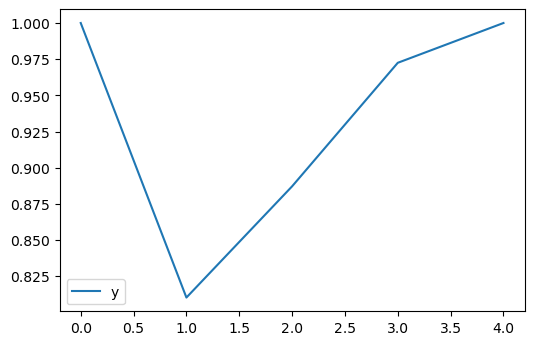

In [116]:
plt.figure(1,dpi=100)
# x= np.linspace(1,l1,l1) # x轴的定义域为 -3.14~3.14，中间间隔100个元素
#plt.plot(,label = "df1")
plt.plot(MIC,label = "y")
#plt.plot(df2,label = "df2")
plt.legend()
plt.show()

In [ ]:

x = 
y = data_df['so2']
        mine = MINE(alpha = 0.6, c = 15)
        mine.compute_score(x, y)
        print(mine.mic())